In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [105]:
import numpy as np
import quaternion
import healpy as hp

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [98]:
NSIDE=8
print(12*NSIDE**2)
list_npix=np.arange(hp.nside2npix(NSIDE))
vectores=hp.pix2vec(NSIDE,list_npix,nest=False)
print(len(list_npix))

768
768


In [99]:
vectores=np.array(vectores).T

<IPython.core.display.Javascript object>


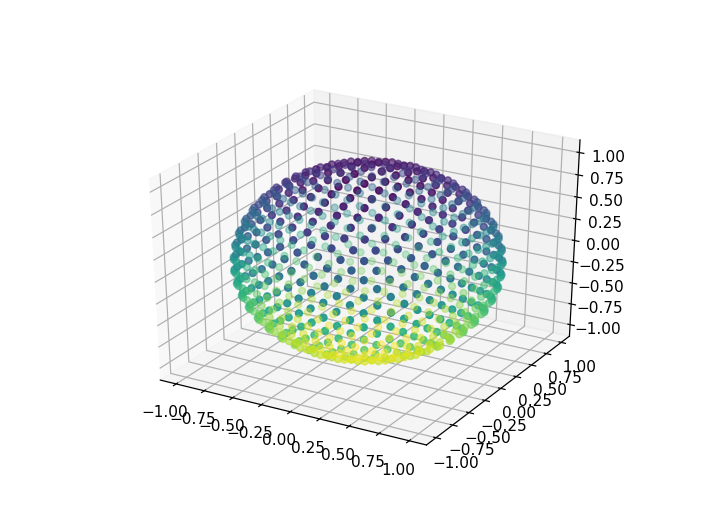

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectores[:,0],vectores[:,1],vectores[:,2],c=list_npix)

In [102]:
neighbours=hp.get_all_neighbours(NSIDE, 123)
neighbours

array([155, 122,  93,  68,  94, 124, 156, 187])

<IPython.core.display.Javascript object>


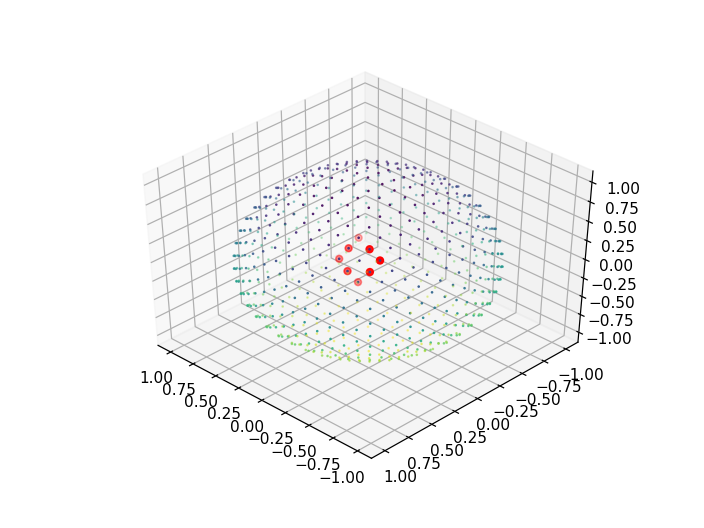

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectores[:,0],vectores[:,1],vectores[:,2],c=list_npix,s=0.5)
ax.scatter(vectores[neighbours,0],vectores[neighbours,1],vectores[neighbours,2],color='red')


In [108]:
sphere_coors=hp.pix2ang(NSIDE,list_npix,nest=False)

In [128]:
qrotors=quaternion.from_spherical_coords(sphere_coors[0],sphere_coors[1])

In [134]:
vectores_rot=quaternion.rotate_vectors(qrotors,(0.0,0.0,1.0))

<IPython.core.display.Javascript object>


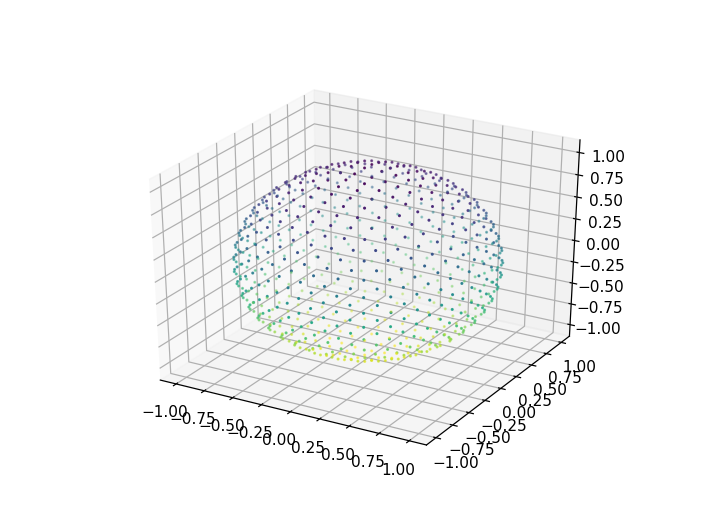

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectores_rot[:,0],vectores_rot[:,1],vectores_rot[:,2],c=list_npix,s=1.0)

(768, 3)

Help on function from_spherical_coords in module quaternion:

from_spherical_coords(theta_phi, phi=None)
    Return the quaternion corresponding to these spherical coordinates
    
    Assumes the spherical coordinates correspond to the quaternion R via
    
        R = exp(phi*z/2) * exp(theta*y/2)
    
    Note that this quaternion rotates `z` onto the point with the given
    spherical coordinates, but also rotates `x` and `y` onto the usual
    basis vectors (theta and phi, respectively) at that point.
    
    Parameters
    ----------
    theta_phi: float or array of floats
        This argument may either contain an array with last dimension of
        size 2, where those two elements describe the (theta, phi) values
        for each point; or it may contain just the theta values, in which
        case the next argument must also be given.
    phi: None, float, or array of floats
        If this array is given, it must be able to broadcast against the
        first argument.
   